In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *

## Part One
#### Approximating the linear vector field

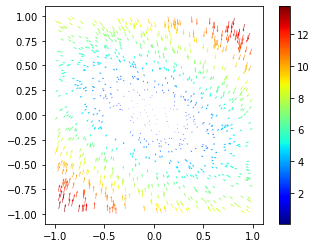

In [2]:
x0 = np.loadtxt('data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('data/linear_vectorfield_data_x1.txt')

dt = 0.01
v = (x1 - x0)/dt
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()

#### Approximating the matrix $A \in \mathbb{R}^{2x2}$

In [3]:
# Approximating the A matrix using numpy.linalg.lstsq
coeff = ret_coeff(x0, v)
A_T = coeff[0:2,0:2]
A = A_T.T
print(A)

[[-4.9355245   2.31911527]
 [-4.63823204 -9.57375731]]


In [4]:
# Using Explicit formula to estimate the coefficient matrix.
'''
A_1 = np.matmul((x0.T),x0);
A_2 = np.linalg.inv(A_1)
A_3 = np.matmul(A_2,x0.T)
A_T = np.matmul(A_3,v)
A = A_T.T

print(A)
'''

'\nA_1 = np.matmul((x0.T),x0);\nA_2 = np.linalg.inv(A_1)\nA_3 = np.matmul(A_2,x0.T)\nA_T = np.matmul(A_3,v)\nA = A_T.T\n\nprint(A)\n'

## Part Two
#### Estimating value of $x_1^{(k)}$ by solving $\dot{x} =\hat{A}x $

In [5]:
x = x0
T_end = 0.1
t = 0
while t < T_end:
    x_dot = x@A
    x += x_dot*dt
    t += dt
x1hat = x
# Estimating the mean squared error
MSE(x1hat, x1)

0.2135637399902036

## Part Three
#### Solving equation with initial point as (10,10)

In [6]:
x = [10, 10]
T_end = 100
t = 0
#x_list = np.empty
x_list = [[10,10]]
#x_dot_list = [0]
while t < T_end:
    x_dot = x@A
    #print(x)
    x += x_dot*dt
    t += dt
    x_list.append(list(x))
    #x_dot_list.append(x_dot)


Text(0.5, 1.0, '$x_0 = (10,10)$; $\\dot{x} =\\hat{A}x $')

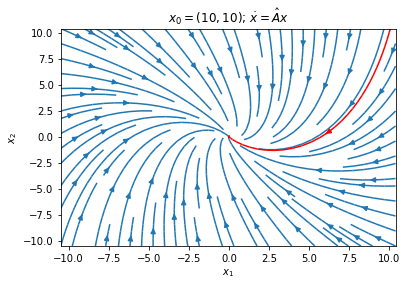

In [8]:
# Plotting the Phase portrait
xmin=-10.5
xmax=10.5
ymin=-10.5
ymax=10.5
X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
XY = np.array([X.flatten(), Y.flatten()])
AXY = np.matmul(A, XY)
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)
plt.figure()
plt.streamplot(X, Y, U, V)
plt.streamplot(X, Y, U, V,start_points=[(10,10)], color='red')
#plt.scatter(x_list[0],x_list[1],c='red')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$x_0 = (10,10)$; $\dot{x} =\hat{A}x $')